In [181]:
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import requests
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [182]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [183]:
tesla = yf.Ticker('TSLA')
tesla

yfinance.Ticker object <TSLA>

In [184]:
tesla_data = tesla.history(period = 'max')
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-18 00:00:00-04:00,214.119995,217.580002,212.360001,215.490005,135813700,0.0,0.0
2023-08-21 00:00:00-04:00,221.550003,232.130005,220.580002,231.279999,135702700,0.0,0.0
2023-08-22 00:00:00-04:00,240.250000,240.820007,229.550003,233.190002,130597900,0.0,0.0


In [191]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [192]:
soup = BeautifulSoup(html_data,'html5lib')
soup

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js"><!--<![endif]--><head>
        <meta charset="utf-8"/>
        <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
		<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter ending

In [204]:
tesla_revenue=pd.read_html(url, match="Tesla Quarterly Revenue", flavor='bs4')[0]
tesla_revenue = tesla_revenue.dropna(subset=['Tesla Quarterly Revenue (Millions of US $).1'], how='any')
tesla_revenue.tail()

,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
48,2010-09-30,$31
49,2010-06-30,$28
50,2010-03-31,$21
52,2009-09-30,$46
53,2009-06-30,$27


In [205]:
game_stop = yf.Ticker("GME")


In [206]:
gme_data = game_stop.history(period="max")

In [207]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [212]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

In [213]:
soup = BeautifulSoup(html_data,'html5lib')


In [216]:
gme_revenue=pd.read_html(url,match="GameStop Quarterly Revenue", flavor='bs4')[0]
gme_revenue.tail() 

,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475
61,2005-01-31,$709


In [ ]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

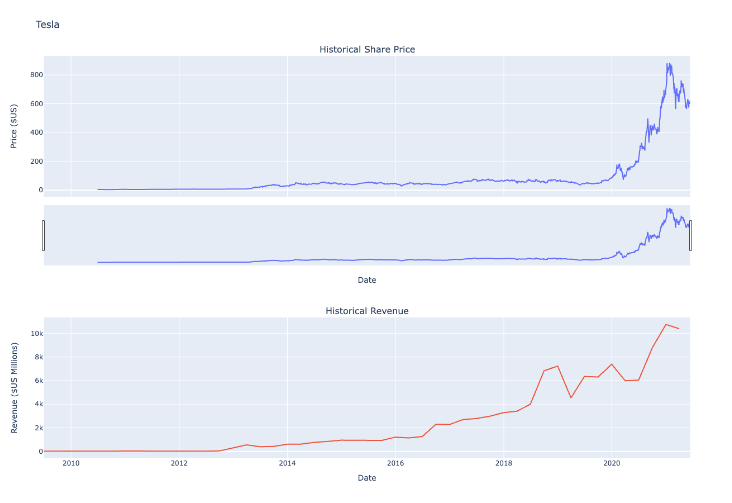

In [ ]:
make_graph(gme_data, gme_revenue, 'GameStop')

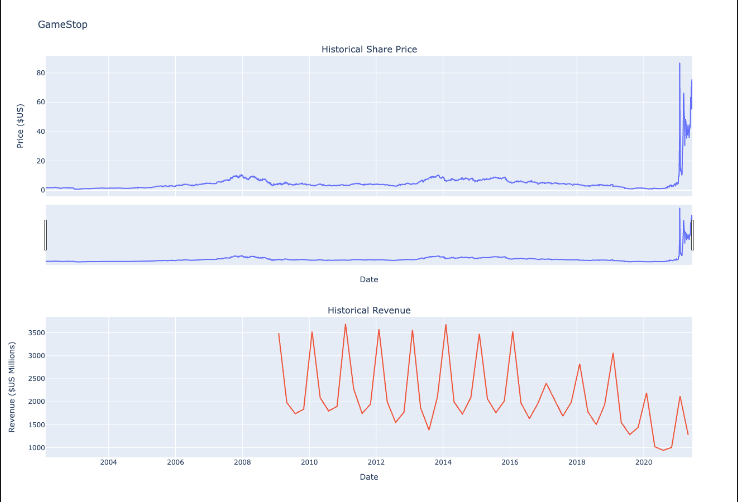